In [22]:
import json
import matplotlib.pyplot as plt
# 设置matplotlib的字体参数
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
plt.rcParams['axes.unicode_minus'] = False  
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
data = {
    "phi": [0.6],
    "sigma": [1],
    "N": [50000]
}

# 写入JSON数据到文件
with open("parameters.json", "w") as file:
    json.dump(data, file, indent=4)

# 1

In [4]:
# Load parameters from a JSON file
with open("parameters.json", "r") as file:
    params = pd.read_json(file)

phi = params['phi']
sigma = params['sigma']
N =int( params['N'])

# Check if N is not less than 5000
if N < 5000:
    raise ValueError("N should not be less than 5000.")

def simulate_ar1(phi, sigma, N):
    # Generate the AR(1) time series
    np.random.seed(0)  # For reproducibility
    errors = np.random.normal(0, sigma, N)
    X = [errors[0]]
    for t in range(1, N):
        X.append(int(phi) * (X[t-1]) + (errors[t]))
    
    # Generate datetime objects as per the requirements
    start_date = pd.Timestamp("2000-03-06 09:30:00")
    end_date = start_date + pd.Timedelta(minutes=N)
    business_dates = pd.bdate_range(start_date, end_date)
    timestamps = []

    for date in business_dates:
        current_time = pd.Timestamp(f"{date.year}-{date.month}-{date.day} 09:30:00")
        end_time = pd.Timestamp(f"{date.year}-{date.month}-{date.day} 15:00:00")
        while current_time <= end_time:
            timestamps.append(current_time)
            current_time += pd.Timedelta(minutes=1)

    # Constructing the DataFrame
    df = pd.DataFrame(X[:len(timestamps)], index=timestamps, columns=['Value'])
    return df

<Figure size 1080x432 with 0 Axes>

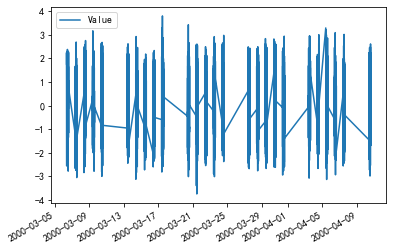

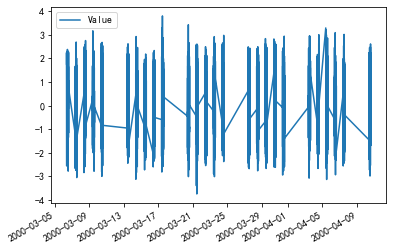

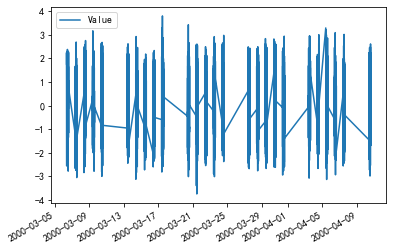

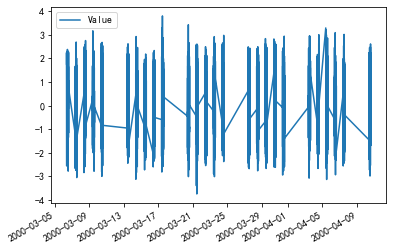

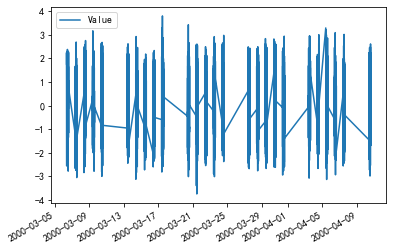

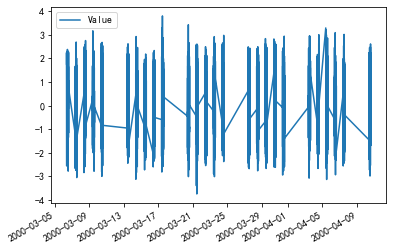

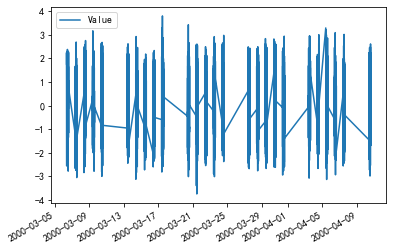

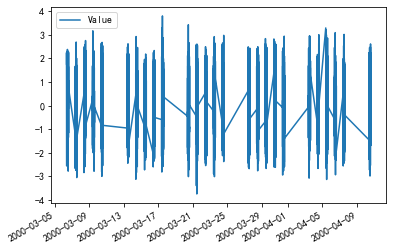

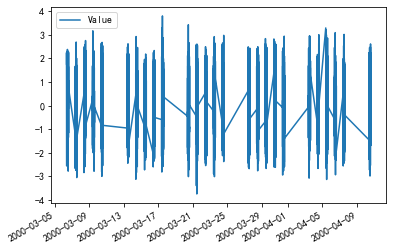

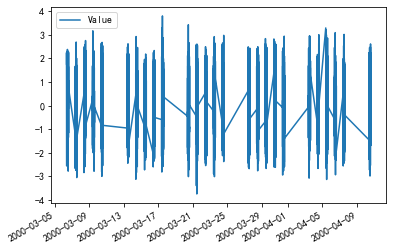

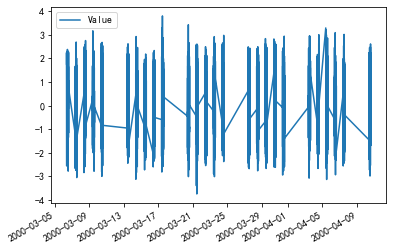

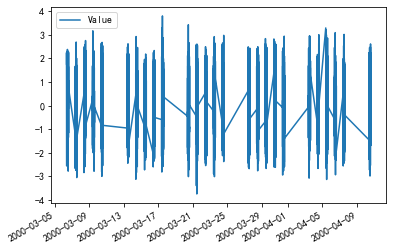

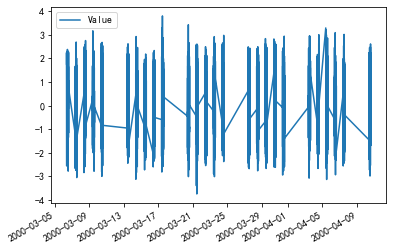

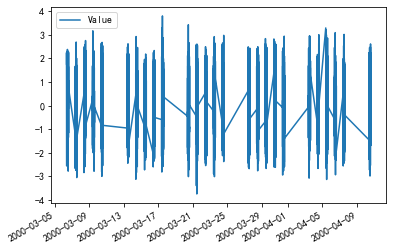

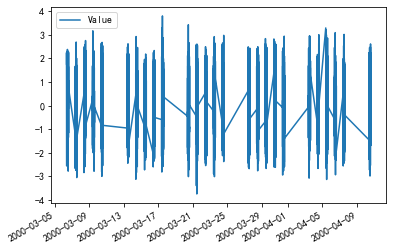

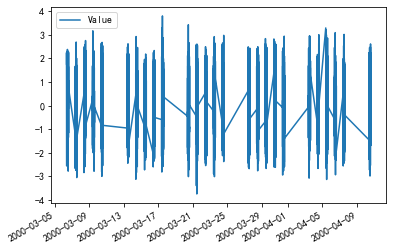

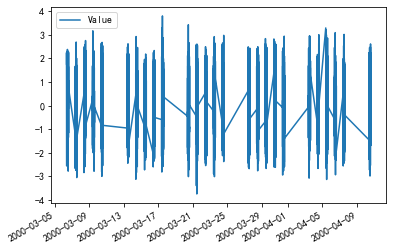

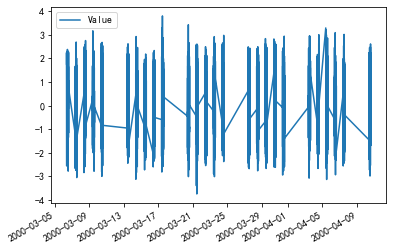

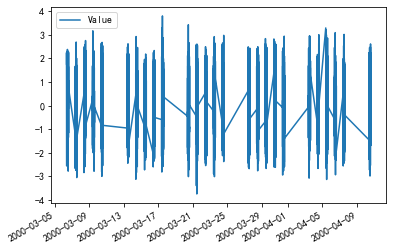

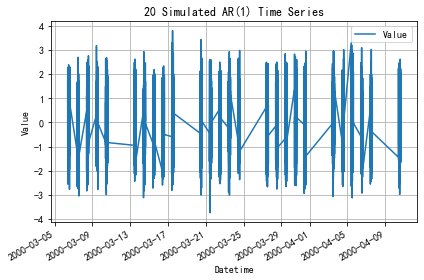

In [5]:
# Generate datetime objects as per the requirements
start_date = pd.Timestamp("2000-03-06 09:30:00")
end_date = start_date + pd.Timedelta(minutes=N)
business_dates = pd.bdate_range(start_date, end_date)
timestamps = []

for date in business_dates:
    current_time = pd.Timestamp(f"{date.year}-{date.month}-{date.day} 09:30:00")
    end_time = pd.Timestamp(f"{date.year}-{date.month}-{date.day} 15:00:00")
    while current_time <= end_time:
        timestamps.append(current_time)
        current_time += pd.Timedelta(minutes=1)

# Simulate 20 time series and plot them
plt.figure(figsize=(15, 6))

for _ in range(20):
    X = simulate_ar1(phi, sigma, N)
    X.plot()

plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('20 Simulated AR(1) Time Series')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
phi_ground_truth = params['phi']
sigma_ground_truth = params['sigma']
N = int(params['N'])

# Simulate an AR(1) time series using the function from the previous code cell
X = simulate_ar1(phi_ground_truth, sigma_ground_truth, N)

# Estimate ARIMA model parameters
model = sm.tsa.ARIMA(X, order=(1,0,0)) # AR(1) model implies p=1, d=0, q=0
results = model.fit()

phi_estimated = results.arparams[0]


sigma_estimated = np.sqrt(results.mse)

# Compare estimated parameters with ground truth
print(f"Ground Truth Phi: {phi_ground_truth}, Estimated Phi: {phi_estimated}")
print(f"Ground Truth Sigma: {sigma_ground_truth}, Estimated Sigma: {sigma_estimated}")


C:\Users\20185\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\20185\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\20185\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Ground Truth Phi: 0    0.6
Name: phi, dtype: float64, Estimated Phi: 0.008348273385032625
Ground Truth Sigma: 0    1
Name: sigma, dtype: int64, Estimated Sigma: 0.9853691741262278


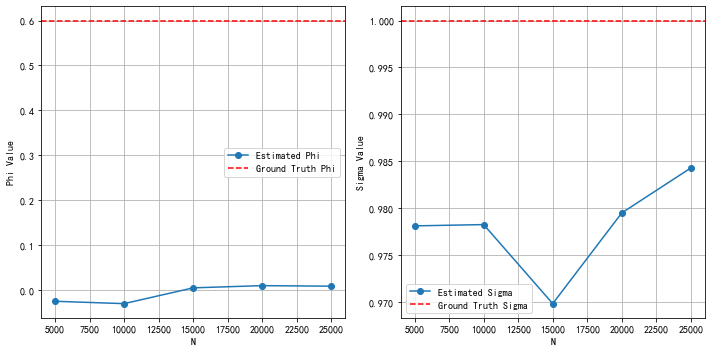

In [12]:
N_values = [5000, 10000, 15000, 20000, 25000]
phi_estimates = []
sigma_estimates = []

for N in N_values:
    X = simulate_ar1(phi_ground_truth, sigma_ground_truth, N)
    model = sm.tsa.ARIMA(X, order=(1,0,0))
    results = model.fit()
    phi_estimates.append(results.arparams[0])
    sigma_estimates.append(np.sqrt(results.mse))

# Plot the estimated values against N
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(N_values, phi_estimates, 'o-', label="Estimated Phi")
plt.axhline(float(phi_ground_truth), color='red', linestyle='--', label="Ground Truth Phi")
plt.xlabel("N")
plt.ylabel("Phi Value")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(N_values, sigma_estimates, 'o-', label="Estimated Sigma")
plt.axhline(float(sigma_ground_truth), color='red', linestyle='--', label="Ground Truth Sigma")
plt.xlabel("N")
plt.ylabel("Sigma Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 2

In [13]:
df = pd.read_csv('C:/Users/20185/Desktop/量化学习/pv.csv')  # assuming tab-separated values

# Display basic statistics
print(df.describe())

                Date      Close      Open      High        Low Volume
count           1106       1106      1106      1106       1106   1106
unique          1106       1103      1102      1100       1106   1081
top     Jan 10, 2023  21,517.20  9,296.50  7,259.40  17,151.70  1.05M
freq               1          2         2         2          1      4


              Close          Open          High           Low        Volume
count   1106.000000   1106.000000   1106.000000   1106.000000  1.106000e+03
mean   28778.358951  28769.478481  29520.326492  27923.271519  5.506702e+07
std    17066.832431  17075.785319  17546.113853  16524.599183  3.258311e+08
min     4826.000000   4815.200000   5369.300000   3869.500000  2.600000e+02
25%    11710.275000  11686.100000  11827.325000  11470.850000  8.107250e+04
50%    23305.800000  23305.800000  24082.800000  22824.650000  1.580600e+05
75%    42813.775000  42810.200000  43903.725000  41829.350000  4.697650e+05
max    67527.900000  67528.700000  68990.600000  66334.900000  4.470000e+09


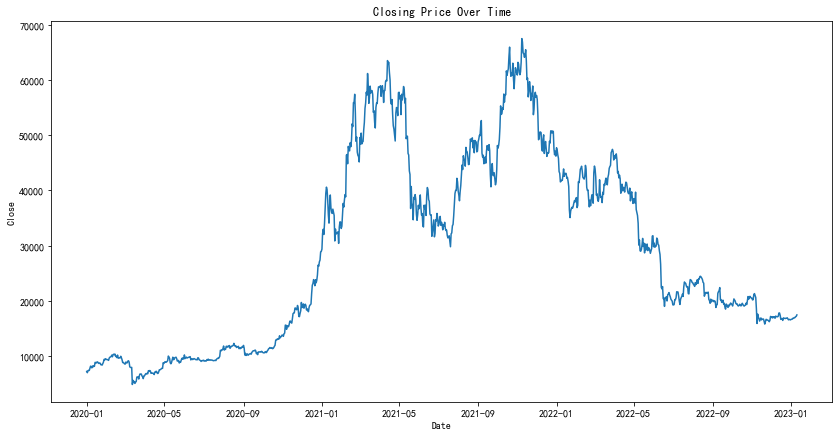

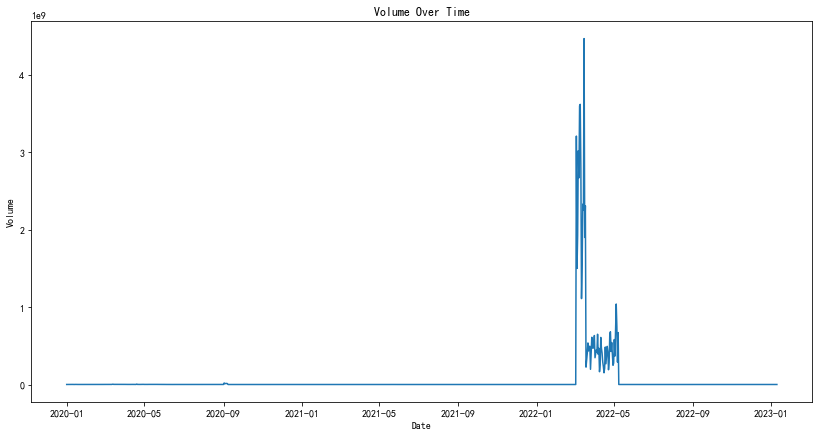

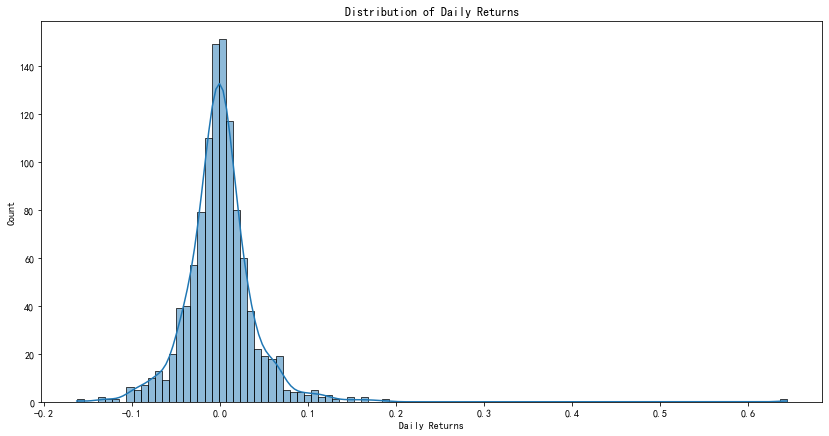

In [14]:

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

# Convert price columns to float, if they are of type object
for column in ['Close', 'Open', 'High', 'Low']:
    if df[column].dtype == 'object':
        df[column] = df[column].str.replace(',', '').astype(float)

def convert_volume(volume):
    volume_str = str(volume)
    if 'K' in volume_str:
        return float(volume_str.replace('K', '')) * 1e3  # Convert to thousands
    elif 'M' in volume_str:
        return float(volume_str.replace('M', '')) * 1e6  # Convert to millions
    elif 'B' in volume_str:
        return float(volume_str.replace('B', '')) * 1e9  # Convert to billions
    else:
        return float(volume)

df['Volume'] = df['Volume'].apply(convert_volume)

# Display basic statistics
print(df.describe())

# Plotting Closing Prices over time
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Closing Price Over Time')
plt.show()

# Volume Analysis
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='Date', y='Volume')
plt.title('Volume Over Time')
plt.show()

# Price Change Distribution
df['Daily Returns'] = df['Close'].pct_change().fillna(0)
plt.figure(figsize=(14,7))
sns.histplot(df['Daily Returns'], bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.show()


In [29]:
df = df.sort_values(by='Date', ascending=True)
# 重置索引
df.reset_index(drop=True, inplace=True)

#Step 1: Data Preparation


# Assuming df is already loaded with data
train_size = int(0.8 * len(df))
train, test = df.iloc[:train_size], df.iloc[train_size:]

#Step 2: Moving Average
N = 10  # Example value; this can be tuned for better performance
predictions_ma = []

for i in range(len(test)):
    last_N_days = train['Close'].iloc[-N:]
    predictions_ma.append(last_N_days.mean())
    train = pd.concat([train, test.iloc[i:i+1]])

mse_ma = mean_squared_error(test['Close'], predictions_ma)

#Step 3: Linear Regression
from sklearn.linear_model import LinearRegression

def create_features(data, N):
    features = []
    for i in range(len(data) - N):
        features.append(data['Close'].iloc[i:i+N].values)
    return np.array(features)

X = create_features(train, N)
y = train['Close'].iloc[N:].values

model = LinearRegression()
model.fit(X, y)

X_test = create_features(test, N)
predictions_lr = model.predict(X_test)

mse_lr = mean_squared_error(test['Close'].iloc[N:], predictions_lr)

#Step 4: Random Forest

from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X, y)

predictions_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(test['Close'].iloc[N:], predictions_rf)



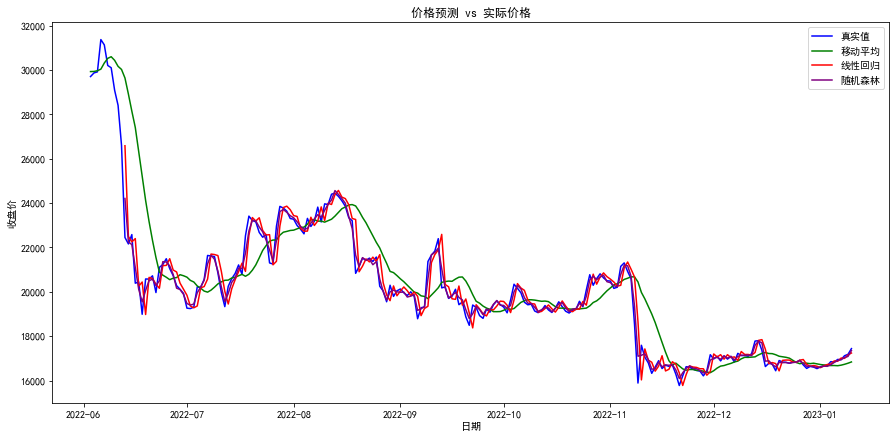

In [31]:
plt.figure(figsize=(15, 7))

# 真实值的起始点
start_point_true = len(test) - len(predictions_ma)

plt.plot(test['Date'].iloc[start_point_true:], test['Close'].iloc[start_point_true:], label="真实值", color='blue')

# 移动平均的起始点
start_point_ma = len(test) - len(predictions_ma)
plt.plot(test['Date'].iloc[start_point_ma:], predictions_ma, label="移动平均", color='green')

# 线性回归和随机森林的起始点
start_point_lr_rf = len(test) - len(predictions_lr)
plt.plot(test['Date'].iloc[start_point_lr_rf:], predictions_lr, label="线性回归", color='red')
plt.plot(test['Date'].iloc[start_point_lr_rf:], predictions_rf, label="随机森林", color='purple')

plt.title('价格预测 vs 实际价格')
plt.xlabel('日期')
plt.ylabel('收盘价')
plt.legend()
plt.show()
